# 프로젝트 1. 선형회귀 설계하여 당뇨병 수치 맞춰보자

## (1) 데이터 가져오기

In [1]:
# 모듈, 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn.datasets as sd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# 데이터셋 살펴보기
diabetes = sd.load_diabetes()

# diabetes 타입
print(type(diabetes))
# diabetes 안에 담긴 정보 확인하기
print(diabetes.keys())
# 데이터를 따로 변수에 저장
db_data = diabetes.data
# db_data 형상정보 출력
print(db_data.shape)
# 샘플 확인
print(db_data[0])

# label
db_label = diabetes.target
print(db_label.shape)
print(diabetes.feature_names)

print(diabetes.DESCR)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
(442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp

In [3]:
# df_X, df_y = sd.load_diabetes(return_X_y=True)
df_X, df_y = diabetes.data, diabetes.target

print(df_X.shape)
print(df_y.shape)
print(type(df_y))

(442, 10)
(442,)
<class 'numpy.ndarray'>


## (2) 모델에 입력할 데이터 `X` 준비하기

In [4]:
X=df_X
y=pd.DataFrame(df_y).to_numpy() 
#print(y.shape)

y=df_y
print(type(y))
print(y.shape)
print(y)

<class 'numpy.ndarray'>
(442,)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 

In [5]:
type(X)

numpy.ndarray

## (3) 모델에 예측할 데이터 `y` 준비하기

In [6]:
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(442,)


## (4) train, test 데이터로 분리하기

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## (5) 모델 준비하기
- 입력 데이터 개수에 맞는 가중치 **`W`**와 **`b`**를 준비해주세요.
- 모델 함수를 구현해주세요.

In [8]:
W = np.random.rand(10)
b = np.random.rand()
print(W, b)

[0.06430188 0.97746459 0.47191109 0.96717279 0.40735999 0.08136809
 0.4668204  0.73148781 0.29554436 0.23370428] 0.5703000536109157


In [9]:
W

array([0.06430188, 0.97746459, 0.47191109, 0.96717279, 0.40735999,
       0.08136809, 0.4668204 , 0.73148781, 0.29554436, 0.23370428])

In [10]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [11]:
len(model(X,W,1))

442

## (6) 손실함수 `loss` 정의하기
손실함수를 MSE 함수로 정의해주세요.

In [12]:
def MSE(a, b):
    mse = ((a-b) ** 2).mean()
    return mse

In [13]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [14]:
loss(X,W,b,y)

28892.17283004439

## (7) 기울기를 구하는 `gradient` 함수 구현하기

In [15]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [16]:
print(X.shape)
print(y.shape)
#error=model(X,W,b)-y
#error.shape
#y_train.value

(442, 10)
(442,)


In [17]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)
print(type(dW))

dW: [ -60.62977208  -13.6534234  -189.60113654 -142.5808585   -68.3442804
  -56.06575674  127.6347531  -139.03188046 -182.89554688 -123.54683164]
db: -303.12636821857006
<class 'numpy.ndarray'>


## (8) 하이퍼 파라미터인 학습률 설정하기

In [18]:
LEARNING_RATE = 0.0001

In [19]:
print(type(dW))
print(dW)

<class 'numpy.ndarray'>
[ -60.62977208  -13.6534234  -189.60113654 -142.5808585   -68.3442804
  -56.06575674  127.6347531  -139.03188046 -182.89554688 -123.54683164]


## (9) 모델 학습하기

In [20]:
losses = []

for i in range(1, 20001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration # %d : Loss %0.4f' % (i, L))

Iteration # 100 : Loss 27951.5936
Iteration # 200 : Loss 27047.3662
Iteration # 300 : Loss 26178.0679
Iteration # 400 : Loss 25342.3316
Iteration # 500 : Loss 24538.8442
Iteration # 600 : Loss 23766.3438
Iteration # 700 : Loss 23023.6182
Iteration # 800 : Loss 22309.5028
Iteration # 900 : Loss 21622.8785
Iteration # 1000 : Loss 20962.6704
Iteration # 1100 : Loss 20327.8455
Iteration # 1200 : Loss 19717.4115
Iteration # 1300 : Loss 19130.4151
Iteration # 1400 : Loss 18565.9401
Iteration # 1500 : Loss 18023.1067
Iteration # 1600 : Loss 17501.0692
Iteration # 1700 : Loss 16999.0154
Iteration # 1800 : Loss 16516.1647
Iteration # 1900 : Loss 16051.7672
Iteration # 2000 : Loss 15605.1027
Iteration # 2100 : Loss 15175.4787
Iteration # 2200 : Loss 14762.2304
Iteration # 2300 : Loss 14364.7189
Iteration # 2400 : Loss 13982.3301
Iteration # 2500 : Loss 13614.4743
Iteration # 2600 : Loss 13260.5849
Iteration # 2700 : Loss 12920.1175
Iteration # 2800 : Loss 12592.5488
Iteration # 2900 : Loss 12277

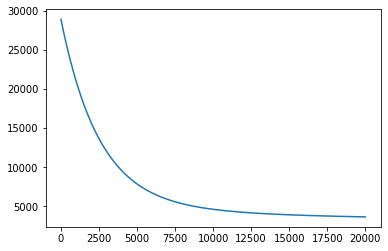

In [21]:
plt.plot(losses)
plt.show()

In [22]:
# W, b 확인
W, b

(array([  56.36852203,  -25.24875217,  221.87413185,  160.21957257,
          30.99742224,   10.19790967, -124.99152456,  120.17414202,
         187.47917289,  123.1617029 ]),
 149.9045159237382)

## (10) test 데이터에 대한 성능 확인하기

In [23]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3248.466973703452

## (11) 정답 데이터와 예측한 데이터 시각화하기

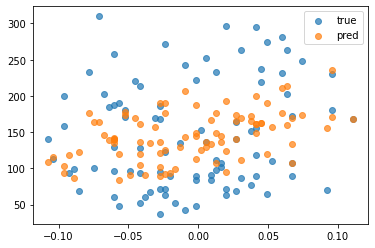

In [24]:
plt.scatter(X_test[:, 0], y_test, label="true", alpha=0.7)
plt.scatter(X_test[:, 0], prediction, label="pred", alpha=0.7)
plt.legend()
plt.show()

# 프로젝트 2 : 맑은 날 자전거 타는 사람 머릿수 추측하기

- Kaggle 데이터넷 가져오기
- 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측하는 문제

    → 시간, 요일, 계절 모두 영향을 미칠 것

- 직접 손실함수와 기울기를 계산하지 않고 `sklearn`의 LinearRegression 모델 활용할 것(순서는 위와 그대로)

## (1) 데이터 가져오기

In [25]:
train = pd.read_csv("~/aiffel/e/rsc/train.csv")
print(train.shape)
print(type(train))
train.head()

(10886, 12)
<class 'pandas.core.frame.DataFrame'>


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [26]:
test = pd.read_csv('~/aiffel/e/rsc/test.csv')
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [27]:
print(type(train['datetime']))
train['datetime'] = pd.to_datetime(train['datetime'])
print(type(train['datetime'][0]))

<class 'pandas.core.series.Series'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [28]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second

In [29]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


In [30]:
type(train)

pandas.core.frame.DataFrame

## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

Text(0.3, 0.3, '한글')

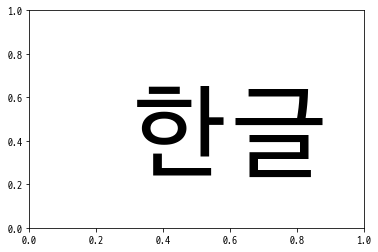

In [31]:
#. 한글 출력
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location='/home/aiffel/.local/share/fonts/D2CodingBold-Ver1.3.2-20180524-ligature.ttf'
font_name=fm.FontProperties(fname=font_location).get_name()
plt.rc('font',family=font_name)
plt.text(0.3, 0.3, '한글', size=100)

In [32]:
# 데이터의 균형 정도를 보기 위한 countplot과 
# 실 value들의 비교를 위한 barplot

[Text(0.5, 0, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

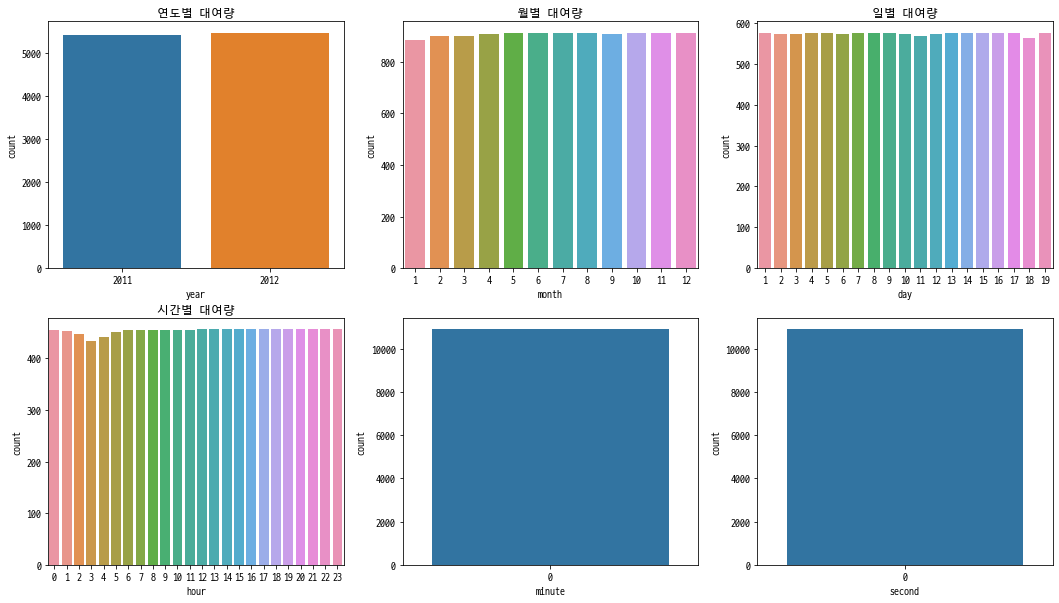

In [33]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(18,10)

sns.countplot(data=train,x="year",ax=ax1)
sns.countplot(data=train,x="month",ax=ax2)
sns.countplot(data=train,x="day",ax=ax3)
sns.countplot(data=train,x="hour",ax=ax4)
sns.countplot(data=train,x="minute",ax=ax5)
sns.countplot(data=train,x="second",ax=ax6)

ax1.set(title="연도별 대여량")
ax2.set(xlabel='month', title="월별 대여량")
ax3.set(xlabel='day', title="일별 대여량")
ax4.set(xlabel='hour',title="시간별 대여량")

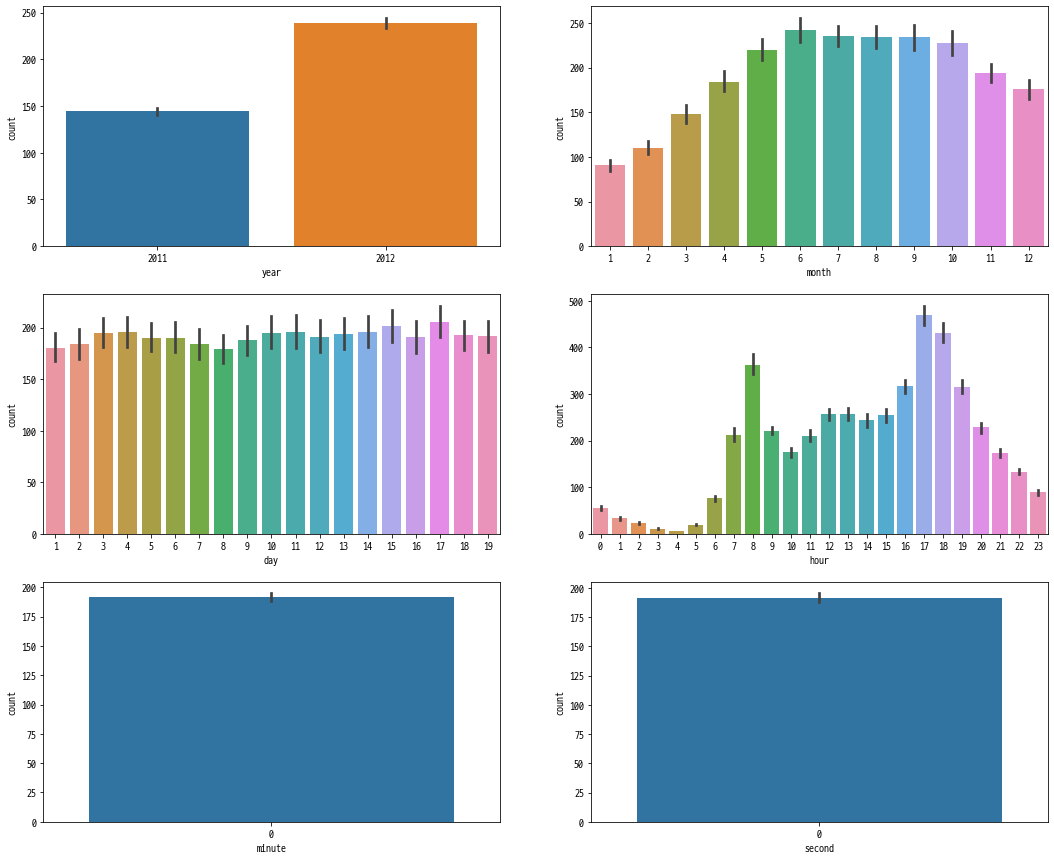

In [34]:
fig=plt.figure(figsize=[18,15])

ax1=fig.add_subplot(3,2,1)
sns.barplot(data=train,x="year",y="count")
ax2=fig.add_subplot(3,2,2)
sns.barplot(data=train,x="month",y="count")
ax3=fig.add_subplot(3,2,3)
sns.barplot(data=train,x="day",y="count")
ax4=fig.add_subplot(3,2,4)
sns.barplot(data=train,x="hour",y="count")
ax5=fig.add_subplot(3,2,5)
sns.barplot(data=train,x="minute",y="count")
ax6=fig.add_subplot(3,2,6)
sns.barplot(data=train,x="second",y="count")

## (4) X, y 컬럼 선택 및 train/test 데이터 분리
---
- **`X`**에는 문자열 데이터, 쓸모없는 데이터를 제외한 컬럼의 데이터 넣기
- **`count`** 값을 맞추고자 하므로, **`y`** 변수에 **`count`** 컬럼의 데이터 넣기

In [35]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [36]:
# X, y 준비
X1 = train[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','year','month','day']].values
y1 = train['count'].values

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [38]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 13) (8708,)
(2178, 13) (2178,)


## (5) LinearRegression 모델 학습

In [39]:
# scikit-learn의 linearregression model 준비
# 가중치 선언, 손실 함수, 기울기 계산 필요 없음
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# 학습하기
model.fit(X_train, y_train)

LinearRegression()

## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
---
- 학습된 모델에 **`X_test`**를 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기

In [40]:
print(X_test.shape)
print(type(X_test))
X_test[0]

(2178, 13)
<class 'numpy.ndarray'>


array([3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 3.362e+01, 4.015e+01,
       5.900e+01, 0.000e+00, 2.900e+01, 9.800e+01, 2.011e+03, 7.000e+00,
       1.900e+01])

In [41]:
predictions = model.predict(X_test)
print(predictions)

print(y_test)

[127.  13. 163. ... 509.   5. 239.]
[127  13 163 ... 509   5 239]


In [42]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print("mse:", mse, ", rmse", rmse)

mse: 1.4551620564990153e-25 , rmse 3.8146586433113713e-13


## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
---
- x축에 X 데이터 중 **`temp`** 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에 X 데이터 중 **`humidity`** 데이터를, y축에는 count 데이터를 넣어서 시각화하기

In [43]:
X_test

array([[3.000e+00, 0.000e+00, 1.000e+00, ..., 2.011e+03, 7.000e+00,
        1.900e+01],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 2.012e+03, 1.000e+00,
        1.600e+01],
       [4.000e+00, 0.000e+00, 0.000e+00, ..., 2.011e+03, 1.200e+01,
        1.100e+01],
       ...,
       [4.000e+00, 0.000e+00, 0.000e+00, ..., 2.012e+03, 1.100e+01,
        4.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.012e+03, 1.000e+00,
        1.000e+00],
       [2.000e+00, 0.000e+00, 1.000e+00, ..., 2.012e+03, 5.000e+00,
        1.500e+01]])

In [44]:
print(type(X_test))
print(X_test.shape)

<class 'numpy.ndarray'>
(2178, 13)


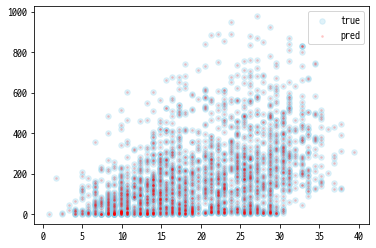

In [52]:
plt.scatter(X_test[:, 4], y_test, label="true", color='skyblue', alpha=0.25, s=30)
plt.scatter(X_test[:, 4], predictions, label="pred", color='red', alpha=0.15, s=3)
plt.legend()
plt.show()

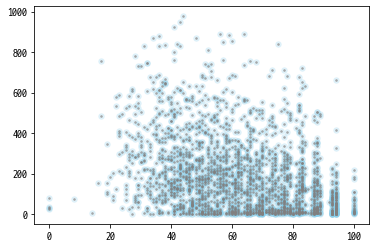

In [46]:
plt.scatter(X_test[:, 6], y_test, label="true", color='skyblue', alpha=0.2, s=30)
plt.scatter(X_test[:, 6], predictions, label="pred", color='gray', alpha=0.5, s=3)
plt.show()

# 마무리
- 3주차가 마무리되고 아직도 익숙하지 않은 개념, 정확히 진행하고 있는지에 대한 가닥이 명확하게 잡히지 않지만 대략적인 프로세스에 대한 역시 매우 대략적인 감은 잡게 된 것 같다.
- 프로젝트 2번 마지막 부분에 있어 prediction과 y_test 결과값이 정확히 일치하여 상당히 놀랐다. 이 부분에 대해 다른 분들과 이야기를 나누어보니 역시나 동일한 값이 나왔다.
- 어렵고 복잡한 개념들에 대해 좀더 능동적으로 개념을 찾아 이해하는 과정을 거쳐야 되겠다.